<h1>Product Analysis Based on Sales Quantities</h1>

In [10]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [12]:
# URL of the file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Send a GET request to the URL
response = requests.get(url)

# Save the content to a local file
with open("Online_Retail.xlsx", "wb") as file:
    file.write(response.content)

In [13]:
df = pd.read_excel("Online_Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
#to delete the duplicate rows from the dataframe & count the rows in every column (drop_duplicates() method is used)
x = df.drop_duplicates()
x.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [15]:
#to delete the empty rows 
df = x.dropna()
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [16]:
# to convert quantities with negative values to positive because quantities cannot be negative
df.loc[:, 'Quantity'] = df['Quantity'].abs()

df.loc[:, 'CustomerID'] = df['CustomerID'].abs()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
# find the quantities sold of each product
quantity_sold_of_each_product = df.groupby('Description')['Quantity'].sum().nlargest(len(df['Description'].unique()))
quantity_sold_of_each_product

#quantity_sold_of_each_product.head(5)
#type(quantity_sold_of_each_product)

Description
PAPER CRAFT , LITTLE BIRDIE           161990
MEDIUM CERAMIC TOP STORAGE JAR        152410
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55519
JUMBO BAG RED RETROSPOT                47193
WHITE HANGING HEART T-LIGHT HOLDER     39284
                                       ...  
DOLPHIN WINDMILL                           1
SET/3 FLORAL GARDEN TOOLS IN BAG           1
CROCHET LILAC/RED BEAR KEYRING             1
FLOWER SHOP DESIGN MUG                     1
BLOSSOM IMAGES SCRAP BOOK SET              1
Name: Quantity, Length: 3896, dtype: int64

In [18]:
# Finding the product with the highest sales quantity
highest_sales_quantity = quantity_sold_of_each_product.max()
highest_sales_products = quantity_sold_of_each_product[quantity_sold_of_each_product == highest_sales_quantity].index.tolist()

# Print the results
print("Product with the highest sales :", highest_sales_products)
print("Highest sales quantity:", highest_sales_quantity)

Product with the highest sales : ['PAPER CRAFT , LITTLE BIRDIE']
Highest sales quantity: 161990


In [19]:
# Finding the product with the lowest sales quantity
lowest_sales_quantity = quantity_sold_of_each_product.min()
lowest_sales_products = quantity_sold_of_each_product[quantity_sold_of_each_product == lowest_sales_quantity].index.tolist()

# to find lowest sold product with StockCode
lowest_sales_df = quantity_sold_of_each_product[quantity_sold_of_each_product == lowest_sales_quantity]
lowest_sales_with_stock_code = pd.merge(lowest_sales_df, df[['Description', 'StockCode']], on='Description', how='left')
lowest_sales_with_stock_code

#print("Product(s) with the lowest sales quantity:", lowest_sales_products)
#print("Lowest sales quantity:", lowest_sales_quantity)

,Description,Quantity,StockCode
0,HEN HOUSE W CHICK IN NEST,1,84227
1,EASTER CRAFT IVY WREATH WITH CHICK,1,22146
2,NEW BAROQUE B'FLY NECKLACE PINK,1,90024D
3,SILVER AND BLACK ORBIT NECKLACE,1,90014C
4,JARDIN ETCHED GLASS BUTTER DISH,1,85144
...,...,...,...
63,DOLPHIN WINDMILL,1,77079
64,SET/3 FLORAL GARDEN TOOLS IN BAG,1,47503J
65,CROCHET LILAC/RED BEAR KEYRING,1,84550
66,FLOWER SHOP DESIGN MUG,1,23664


<h4>Quantities Sold of Each Product</h4>
<p>The analysis focuses on the quantities sold for each product, identifying the best-selling and least-selling products.</p>

<h4> Highest and Lowest Selling Products</h4>

<ol type="1">
    <li><strong> Highest Selling Product: </strong></li>
    <ul>
        <li>Product: PAPER CRAFT, LITTLE BIRDIE </li>
        <li>Quantity Sold: 161,990 </li></ul><br>
    <li><strong> Lowest Selling Products:</strong></li>
    <span>There are multiple products tied for the lowest sales quantity, each selling only 1 unit. These include:</span>
    <ul>
        <li>HEN HOUSE W CHICK IN NEST (StockCode: 84227)</li>
        <li>EASTER CRAFT IVY WREATH WITH CHICK (StockCode: 22146)</li>
        <li>NEW BAROQUE B'FLY NECKLACE PINK (StockCode: 90024D)</li>
        <li>SILVER AND BLACK ORBIT NECKLACE (StockCode: 90014C)</li>
        <li>JARDIN ETCHED GLASS BUTTER DISH (StockCode: 85144)</li>
        <li>And several others, totaling 68 products.</li></ul>

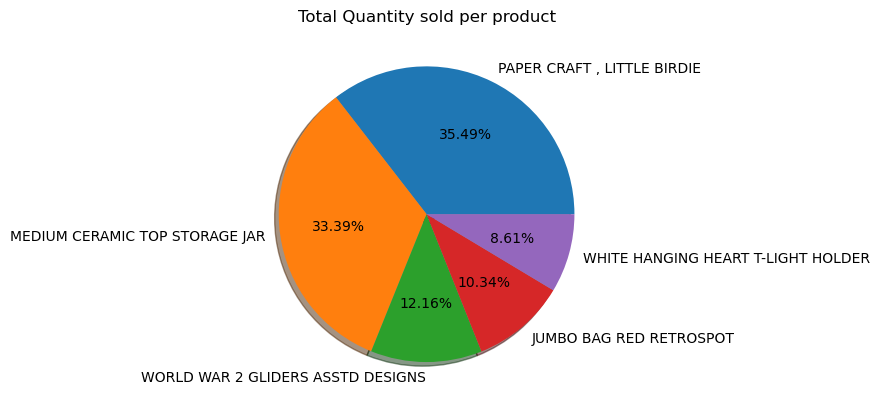

In [20]:
#pie chart for top 5 quantities sold

quantity_sold_of_each_product.nlargest(5).plot(kind='pie',shadow=True, autopct='%1.2f%%')
plt.title("Total Quantity sold per product")
plt.ylabel('')
plt.show()

In [22]:
# Extract the top 5 descriptions and remaining product total quantities in others
top_5_descriptions = quantity_sold_of_each_product.head(5)
other_descriptions = quantity_sold_of_each_product[5:]

# Sum the quantities of the remaining descriptions
other_quantity = other_descriptions.sum()

# Combine the top 5 descriptions with 'Others'
top_5_descriptions['Others'] = other_quantity
print(top_5_descriptions)

Description
PAPER CRAFT , LITTLE BIRDIE            161990
MEDIUM CERAMIC TOP STORAGE JAR         152410
WORLD WAR 2 GLIDERS ASSTD DESIGNS       55519
JUMBO BAG RED RETROSPOT                 47193
WHITE HANGING HEART T-LIGHT HOLDER      39284
Others                                4982525
Name: Quantity, dtype: int64


<h4>Visualization:<h4> 
<p>Top 5 Quantities Sold per Product</p>
<p>A pie chart visualizes the distribution of quantities sold among the top 5 products, with the remaining products grouped into "Others"</p>
<p>The chart highlights the dominance of the top product, PAPER CRAFT, LITTLE BIRDIE, in terms of quantities sold.</p>

In [23]:
# total quantity of the items purchased by each unique country 
total_quantity_per_country = df.groupby('Country')['Quantity'].sum().nlargest(10)
total_quantity_per_country

Country
United Kingdom    4513204
Netherlands        201746
EIRE               144579
Germany            120971
France             113052
Australia           84755
Sweden              36524
Switzerland         30388
Spain               29071
Japan               26814
Name: Quantity, dtype: int64

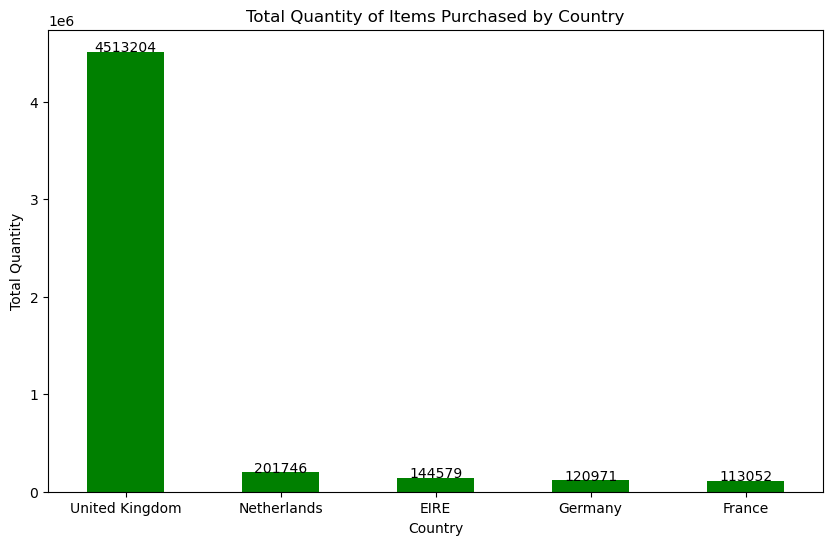

In [24]:
#to count the total number of quantities purchased in each unique country
total_quantity_per_country.nlargest(5).plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Total Quantity of Items Purchased by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)
#plt.tight_layout()

for i in range(5):
    plt.text(x=i, y=total_quantity_per_country[i], s=str(total_quantity_per_country[i]), ha='center')

plt.show()

<h4>Total Quantity of Items Purchased by Country</h4>
<p>The analysis extends to the total quantities of items purchased by each country, identifying the top 10 countries.</p>

<ol>
    <li><strong>Top Country:</strong> United Kingdom with 4,513,204 units purchased.</li>
    <li><strong>Other Leading Countries:</strong>
    <ul>
        <li>Netherlands: 201,746 units</li>
        <li>EIRE: 144,579 units</li>
        <li>Germany: 120,971 units</li>
        <li>France: 113,052 units</li>

<h4>Visualization:<h4> 
<p>Total Quantity of Items Purchased by Country
<p>A bar chart visualizes the top 5 countries by total quantities purchased.</p>
<p>The chart clearly shows the dominance of the United Kingdom in terms of quantity purchased, followed by a significant gap to the next highest countries.</p>

In [27]:
# Group by 'StockCode' and sum the 'Quantity'
total_quantities = df.groupby('StockCode', as_index=False)['Quantity'].sum()

# Merge with the original DataFrame to get descriptions
# Drop duplicates to ensure each StockCode has one Description
unique_stock_descriptions = df[['StockCode', 'Description']].drop_duplicates()

# Merge the total quantities with the descriptions
result = pd.merge(total_quantities, unique_stock_descriptions, on='StockCode', how='left')

# Optionally, sort the result by total quantities sold in descending order
#result = result.sort_values(by='Quantity', ascending=False).reset_index(drop=True)

# Display the first few rows of the result
print(result)

     StockCode  Quantity                   Description
0        10002       823   INFLATABLE POLITICAL GLOBE 
1        10080       291      GROOVY CACTUS INFLATABLE
2        10120       192                  DOGGY RUBBER
3        10125      1225       MINI FUNKY DESIGN TAPES
4        10133      2383  COLOURING PENCILS BROWN TUBE
...        ...       ...                           ...
3911         D      1194                      Discount
3912       DOT        16                DOTCOM POSTAGE
3913         M     10934                        Manual
3914      PADS         4    PADS TO MATCH ALL CUSHIONS
3915      POST      3238                       POSTAGE

[3916 rows x 3 columns]


<h4>Stock Code Analysis</h4>
<p>Grouping by 'StockCode' and summing the 'Quantity' provides insight into the quantities sold for each stock item. This data can help in managing inventory and understanding the demand for specific stock items.</p>

<h3>Key Insights and Recommendations</h3>
<ol type="1">
    <li><strong>Product Popularity:</strong> The PAPER CRAFT, LITTLE BIRDIE product is significantly more popular than others, indicating a high demand. Ensure sufficient stock levels for this product to avoid stockouts.</li>
    <li><strong>Low-Performing Products:</strong> The presence of multiple products with only 1 unit sold suggests a need for review. Consider discontinuing or reevaluating marketing strategies for these products.</li>
<li><strong>Market Focus:<strong> The United Kingdom is the largest market by a substantial margin. Focus marketing and sales strategies here to leverage the high demand.</li>
    <li><strong>Country-Specific Strategies:</strong> Tailor marketing strategies for other significant markets like the Netherlands, EIRE, Germany, and France to boost sales.</li>
    <li><strong>Inventory Management:</strong> Use the stock quantity data to manage inventory levels effectively, ensuring high-demand items are well-stocked and low-demand items are minimized to reduce holding costs.</li>
</ol>
<p>This product analysis provides a comprehensive view of product performance and market demand, guiding strategic decisions in inventory management, marketing, and sales optimization.</p>